In [1]:
import networkx as nx
import community
from networkx.algorithms.community import centrality as c
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

In [2]:
G = nx.read_edgelist("GameOfThrones.txt", create_using = nx.Graph(), nodetype=str, delimiter=",", data=(('weight',int),('season',int),))

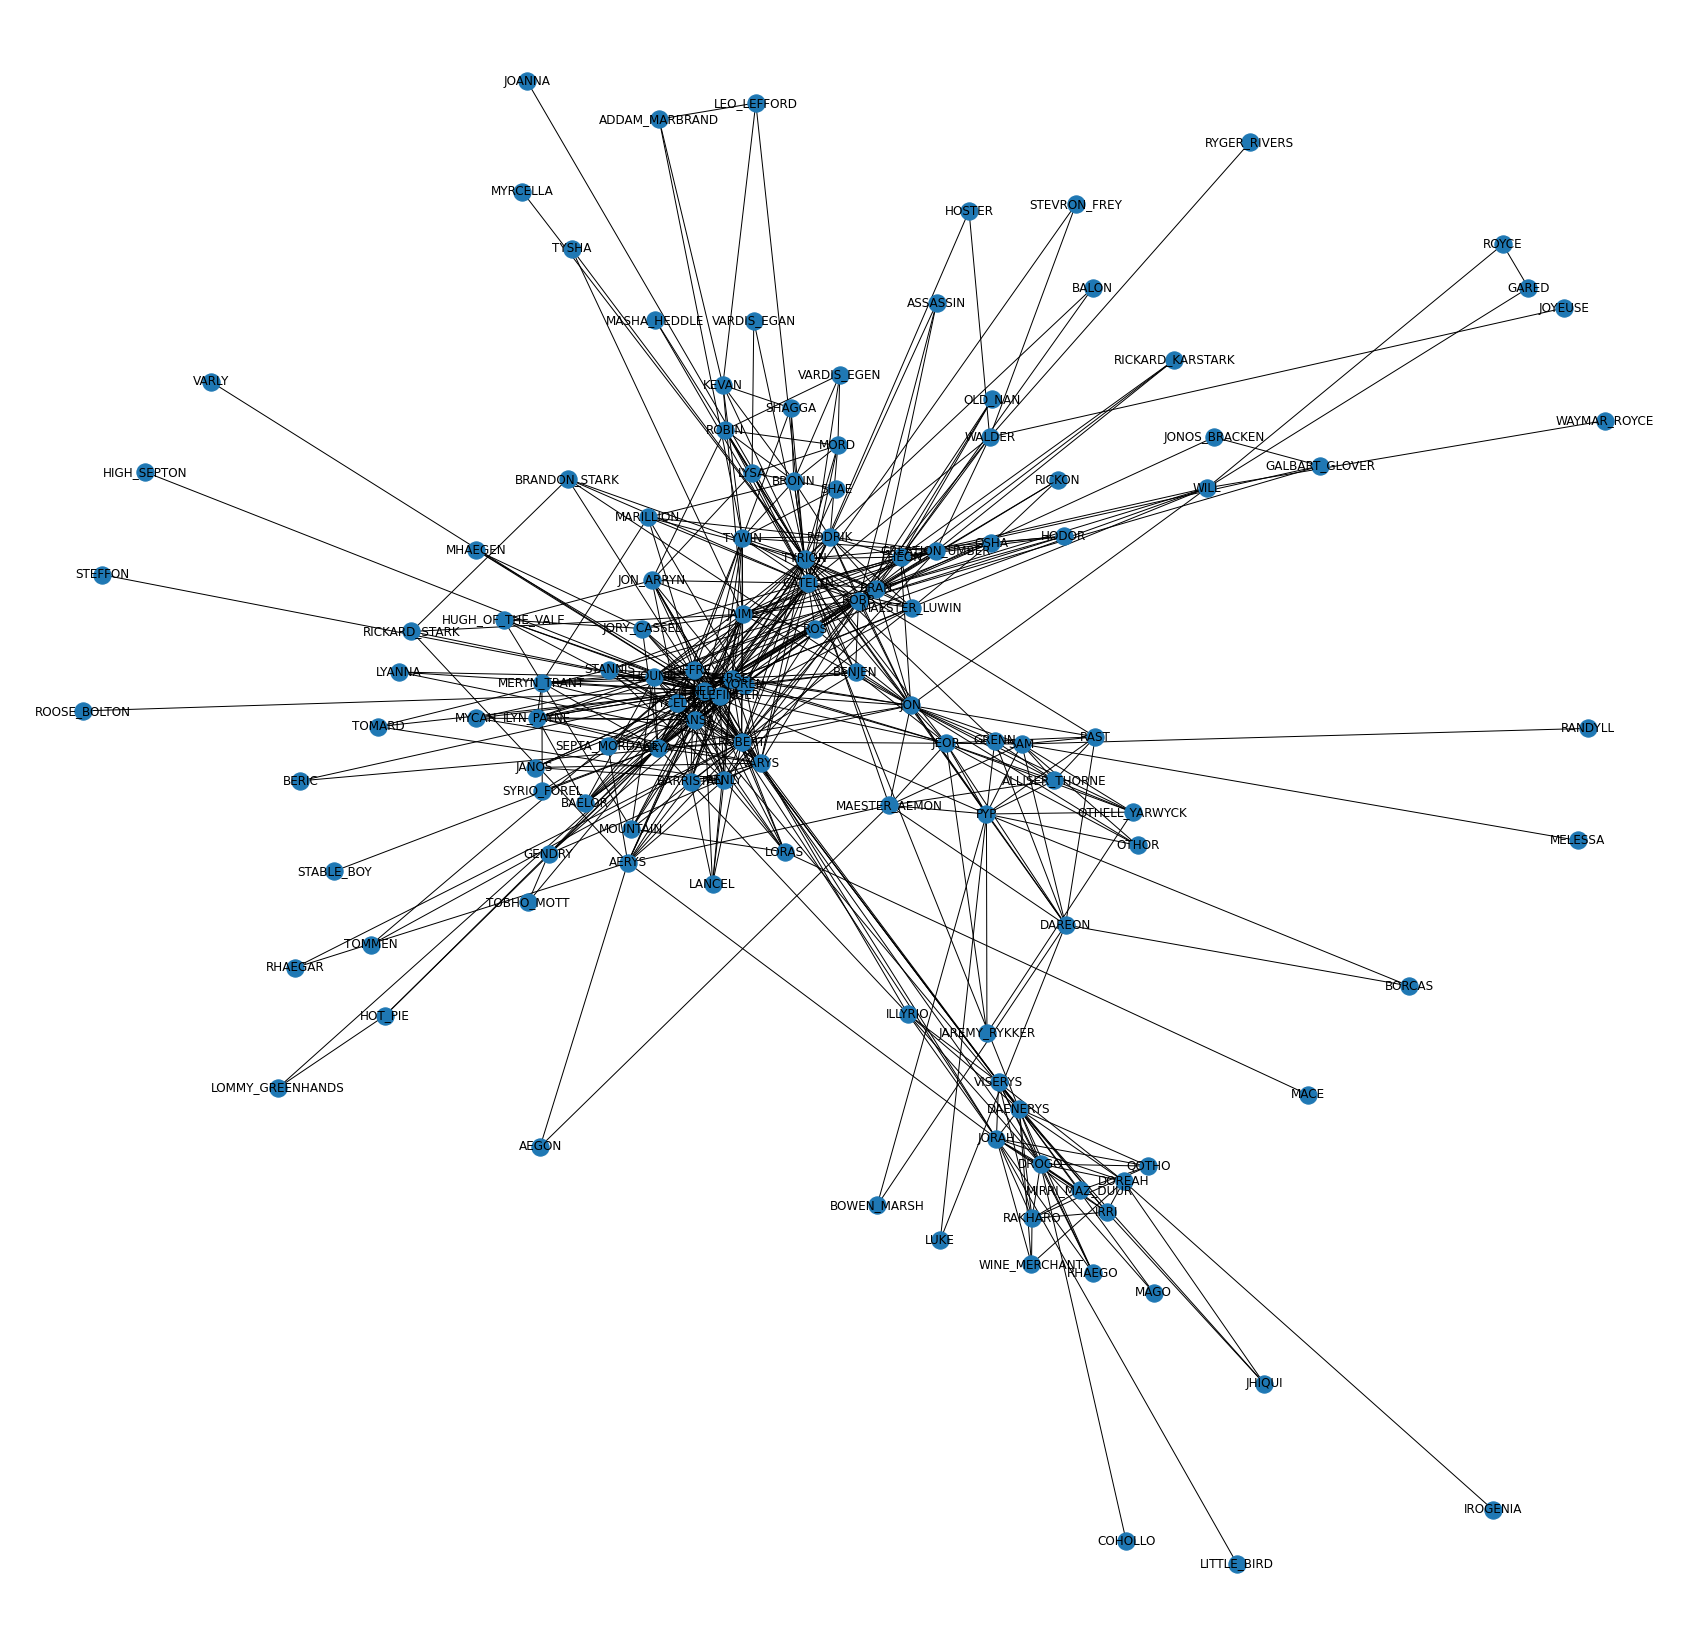

In [3]:
pos = nx.spring_layout(G)
plt.figure(figsize=(30,30))
nx.draw_networkx(G, pos = pos, with_labels=True)
plt.axis('off')
plt.show()

In [4]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 127
Number of edges: 549
Average degree:   8.6457


In [5]:
char_degree = G.degree()
character_degree = dict(char_degree)

values = character_degree.values()
max_character = max(character_degree, key=character_degree.get)  
print("The character with the highest degree is {} with {} degrees".format(max_character, max(values)))

The character with the highest degree is NED with 57 degrees


In [6]:
number_connected_components = list(nx.connected_components(G))
print("The number of connected components in the graph is",len(number_connected_components[0]))

The number of connected components in the graph is 127


In [7]:
number_maximal_cliques = list(nx.find_cliques(G))
print("The number of maximal cliques in the graph is",len(number_maximal_cliques))

The number of maximal cliques in the graph is 163


In [8]:
main_core = nx.k_core(G)
print(main_core.degree())

[('VARYS', 12), ('CERSEI', 17), ('NED', 17), ('BRAN', 10), ('JAIME', 14), ('ROBERT', 16), ('JOFFREY', 16), ('SANSA', 13), ('JON', 10), ('ARYA', 16), ('HOUND', 13), ('TYWIN', 10), ('YOREN', 11), ('PYCELLE', 10), ('ROBB', 14), ('TYRION', 15), ('LITTLEFINGER', 14), ('CATELYN', 16)]


In [9]:
core_order = min(dict(main_core.degree).values())
core_order

10

In [10]:
k_main_core = list(nx.k_core(G, k=core_order).nodes()) 
print(k_main_core)

['VARYS', 'CERSEI', 'NED', 'BRAN', 'JAIME', 'ROBERT', 'JOFFREY', 'SANSA', 'JON', 'ARYA', 'HOUND', 'TYWIN', 'YOREN', 'PYCELLE', 'ROBB', 'TYRION', 'LITTLEFINGER', 'CATELYN']


In [11]:
print("The number of nodes in the main core is {} and the k-value that gives this main core is {}".format(len(k_main_core), core_order))

The number of nodes in the main core is 18 and the k-value that gives this main core is 10


In [12]:
degrees = sorted([degree for node, degree in G.degree()], reverse=True)
print(degrees)

[57, 41, 36, 36, 30, 29, 28, 27, 26, 26, 26, 24, 21, 20, 19, 18, 18, 17, 17, 16, 16, 16, 16, 15, 13, 13, 13, 12, 12, 12, 11, 11, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [13]:
max_degree = max(degrees)
crust_degree = max_degree - core_order
k_main_crust = list(nx.k_crust(G).nodes())
print(k_main_crust)

['DAENERYS', 'JORAH', 'SAM', 'DROGO', 'BRONN', 'SHAE', 'VISERYS', 'SEPTA_MORDANE', 'JEOR', 'THEON', 'MAESTER_LUWIN', 'LORAS', 'RENLY', 'MIRRI_MAZ_DUUR', 'SYRIO_FOREL', 'JORY_CASSEL', 'PYP', 'ROS', 'GRENN', 'WALDER', 'DOREAH', 'BENJEN', 'IRRI', 'GREATJON_UMBER', 'MORD', 'LYSA', 'RAKHARO', 'ROBIN', 'OSHA', 'RODRIK', 'QOTHO', 'MAESTER_AEMON', 'BARRISTAN', 'ILLYRIO', 'SHAGGA', 'ALLISER_THORNE', 'WINE_MERCHANT', 'LANCEL', 'RICKON', 'MARILLION', 'KEVAN', 'VARDIS_EGEN', 'RHAEGO', 'JANOS', 'GENDRY', 'HOT_PIE', 'LOMMY_GREENHANDS', 'MERYN_TRANT', 'JON_ARRYN', 'HODOR', 'STANNIS', 'MAGO', 'MYCAH', 'TOBHO_MOTT', 'RAST', 'OLD_NAN', 'MHAEGEN', 'VARDIS_EGAN', 'AERYS', 'BAELOR', 'DAREON', 'STABLE_BOY', 'HUGH_OF_THE_VALE', 'OTHELL_YARWYCK', 'OTHOR', 'MOUNTAIN', 'TOMARD', 'GARED', 'ROYCE', 'JONOS_BRACKEN', 'MASHA_HEDDLE', 'RICKARD_STARK', 'ILYN_PAYNE', 'WILL', 'LYANNA', 'RYGER_RIVERS', 'STEVRON_FREY', 'WAYMAR_ROYCE', 'ADDAM_MARBRAND', 'LEO_LEFFORD', 'RHAEGAR', 'ASSASSIN', 'BALON', 'BERIC', 'BRANDON_STARK

In [14]:
print("The number of nodes in the main crust is {}".format(len(k_main_crust)))

The number of nodes in the main crust is 109


In [15]:
k_corona = list(nx.k_corona(G, k = core_order).nodes())
print(k_corona)

['PYCELLE', 'JON', 'TYWIN', 'BRAN']


In [16]:
print("The number of nodes in the main corona is {}".format(len(k_corona)))

The number of nodes in the main corona is 4


In [17]:
k_shell = list(nx.k_shell(G, k = core_order).nodes())
print(k_shell)

['VARYS', 'CERSEI', 'NED', 'BRAN', 'JAIME', 'ROBERT', 'JOFFREY', 'SANSA', 'JON', 'ARYA', 'HOUND', 'TYWIN', 'YOREN', 'PYCELLE', 'ROBB', 'TYRION', 'LITTLEFINGER', 'CATELYN']


In [18]:
print("The number of nodes in the main shell is {}".format(len(k_shell)))

The number of nodes in the main shell is 18


In [19]:
G_nodes_list = list(G.nodes())
print(G_nodes_list)

['NED', 'ROBERT', 'DAENERYS', 'JORAH', 'JON', 'SAM', 'LITTLEFINGER', 'VARYS', 'DROGO', 'ARYA', 'CATELYN', 'ROBB', 'BRONN', 'TYRION', 'CERSEI', 'SHAE', 'JOFFREY', 'SANSA', 'PYCELLE', 'VISERYS', 'SEPTA_MORDANE', 'TYWIN', 'JEOR', 'THEON', 'BRAN', 'MAESTER_LUWIN', 'JAIME', 'LORAS', 'RENLY', 'MIRRI_MAZ_DUUR', 'SYRIO_FOREL', 'JORY_CASSEL', 'PYP', 'ROS', 'GRENN', 'WALDER', 'DOREAH', 'BENJEN', 'IRRI', 'GREATJON_UMBER', 'MORD', 'LYSA', 'RAKHARO', 'ROBIN', 'OSHA', 'RODRIK', 'QOTHO', 'MAESTER_AEMON', 'BARRISTAN', 'ILLYRIO', 'SHAGGA', 'YOREN', 'ALLISER_THORNE', 'WINE_MERCHANT', 'HOUND', 'LANCEL', 'RICKON', 'MARILLION', 'KEVAN', 'VARDIS_EGEN', 'RHAEGO', 'JANOS', 'GENDRY', 'HOT_PIE', 'LOMMY_GREENHANDS', 'MERYN_TRANT', 'JON_ARRYN', 'HODOR', 'STANNIS', 'MAGO', 'MYCAH', 'TOBHO_MOTT', 'RAST', 'OLD_NAN', 'MHAEGEN', 'VARDIS_EGAN', 'AERYS', 'BAELOR', 'DAREON', 'STABLE_BOY', 'HUGH_OF_THE_VALE', 'OTHELL_YARWYCK', 'OTHOR', 'MOUNTAIN', 'TOMARD', 'GARED', 'ROYCE', 'JONOS_BRACKEN', 'MASHA_HEDDLE', 'RICKARD_STARK

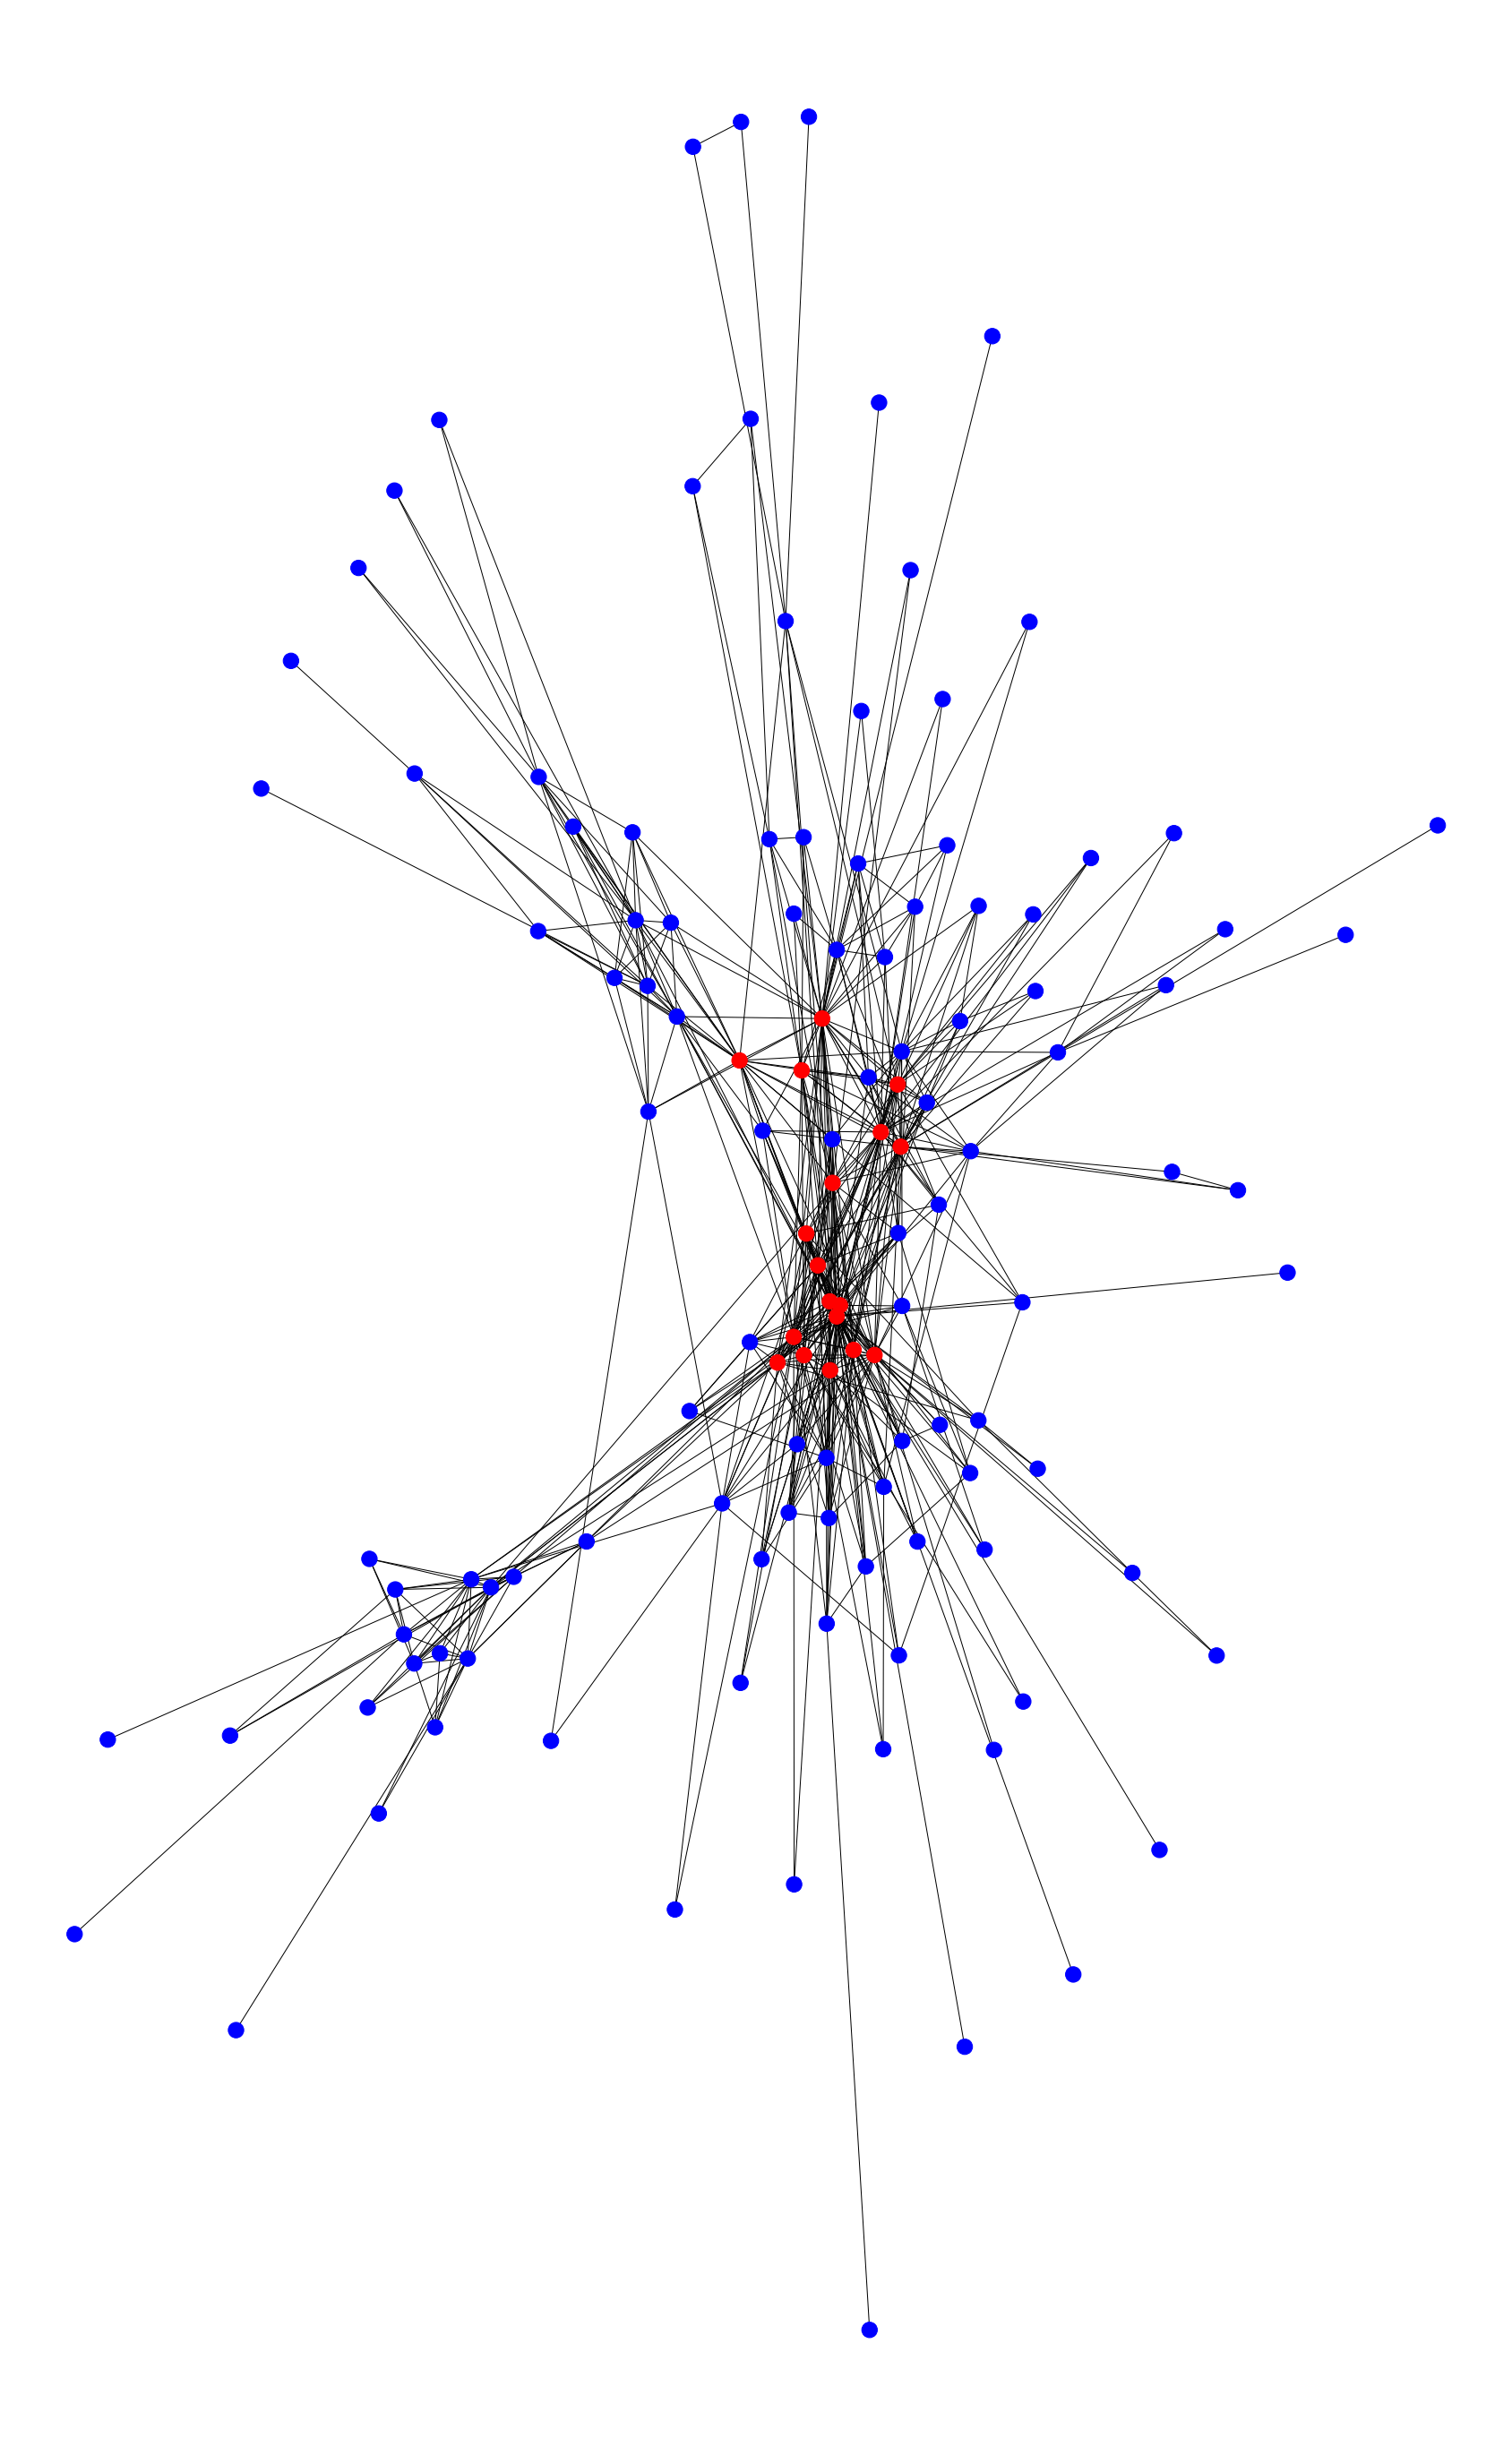

In [20]:
pos = nx.spring_layout(G)
plt.figure(figsize=(30,50))
color_map = []
for node in G_nodes_list:
    if node in k_main_core:
        color_map.append('red')
    else: 
        color_map.append('blue')      
nx.draw_networkx(G, node_color=color_map, with_labels=False)
plt.axis('off')
plt.show()

In [21]:
louvain_partition = community.best_partition(G)
print(louvain_partition)

{'NED': 0, 'ROBERT': 0, 'DAENERYS': 1, 'JORAH': 1, 'JON': 2, 'SAM': 2, 'LITTLEFINGER': 0, 'VARYS': 0, 'DROGO': 1, 'ARYA': 0, 'CATELYN': 3, 'ROBB': 3, 'BRONN': 4, 'TYRION': 4, 'CERSEI': 0, 'SHAE': 4, 'JOFFREY': 0, 'SANSA': 0, 'PYCELLE': 0, 'VISERYS': 1, 'SEPTA_MORDANE': 0, 'TYWIN': 4, 'JEOR': 2, 'THEON': 3, 'BRAN': 3, 'MAESTER_LUWIN': 3, 'JAIME': 4, 'LORAS': 0, 'RENLY': 0, 'MIRRI_MAZ_DUUR': 1, 'SYRIO_FOREL': 0, 'JORY_CASSEL': 0, 'PYP': 2, 'ROS': 3, 'GRENN': 2, 'WALDER': 3, 'DOREAH': 1, 'BENJEN': 2, 'IRRI': 1, 'GREATJON_UMBER': 3, 'MORD': 4, 'LYSA': 4, 'RAKHARO': 1, 'ROBIN': 4, 'OSHA': 3, 'RODRIK': 3, 'QOTHO': 1, 'MAESTER_AEMON': 2, 'BARRISTAN': 0, 'ILLYRIO': 1, 'SHAGGA': 4, 'YOREN': 0, 'ALLISER_THORNE': 2, 'WINE_MERCHANT': 1, 'HOUND': 0, 'LANCEL': 0, 'RICKON': 3, 'MARILLION': 3, 'KEVAN': 4, 'VARDIS_EGEN': 3, 'RHAEGO': 1, 'JANOS': 0, 'GENDRY': 0, 'HOT_PIE': 5, 'LOMMY_GREENHANDS': 5, 'MERYN_TRANT': 0, 'JON_ARRYN': 0, 'HODOR': 3, 'STANNIS': 0, 'MAGO': 1, 'MYCAH': 0, 'TOBHO_MOTT': 0, 'RAST'

In [22]:
print("With the Louvain method:")
print("\n")
print("There are {} communities".format(len(louvain_partition)))
print("The size of the largest community is {}".format(max(louvain_partition.values())))
print("The size of the largest community is {}".format(min(louvain_partition.values())))
print("Modularity is {}".format(community.modularity(louvain_partition, G)))

With the Louvain method:


There are 127 communities
The size of the largest community is 5
The size of the largest community is 0
Modularity is 0.5285687122102977


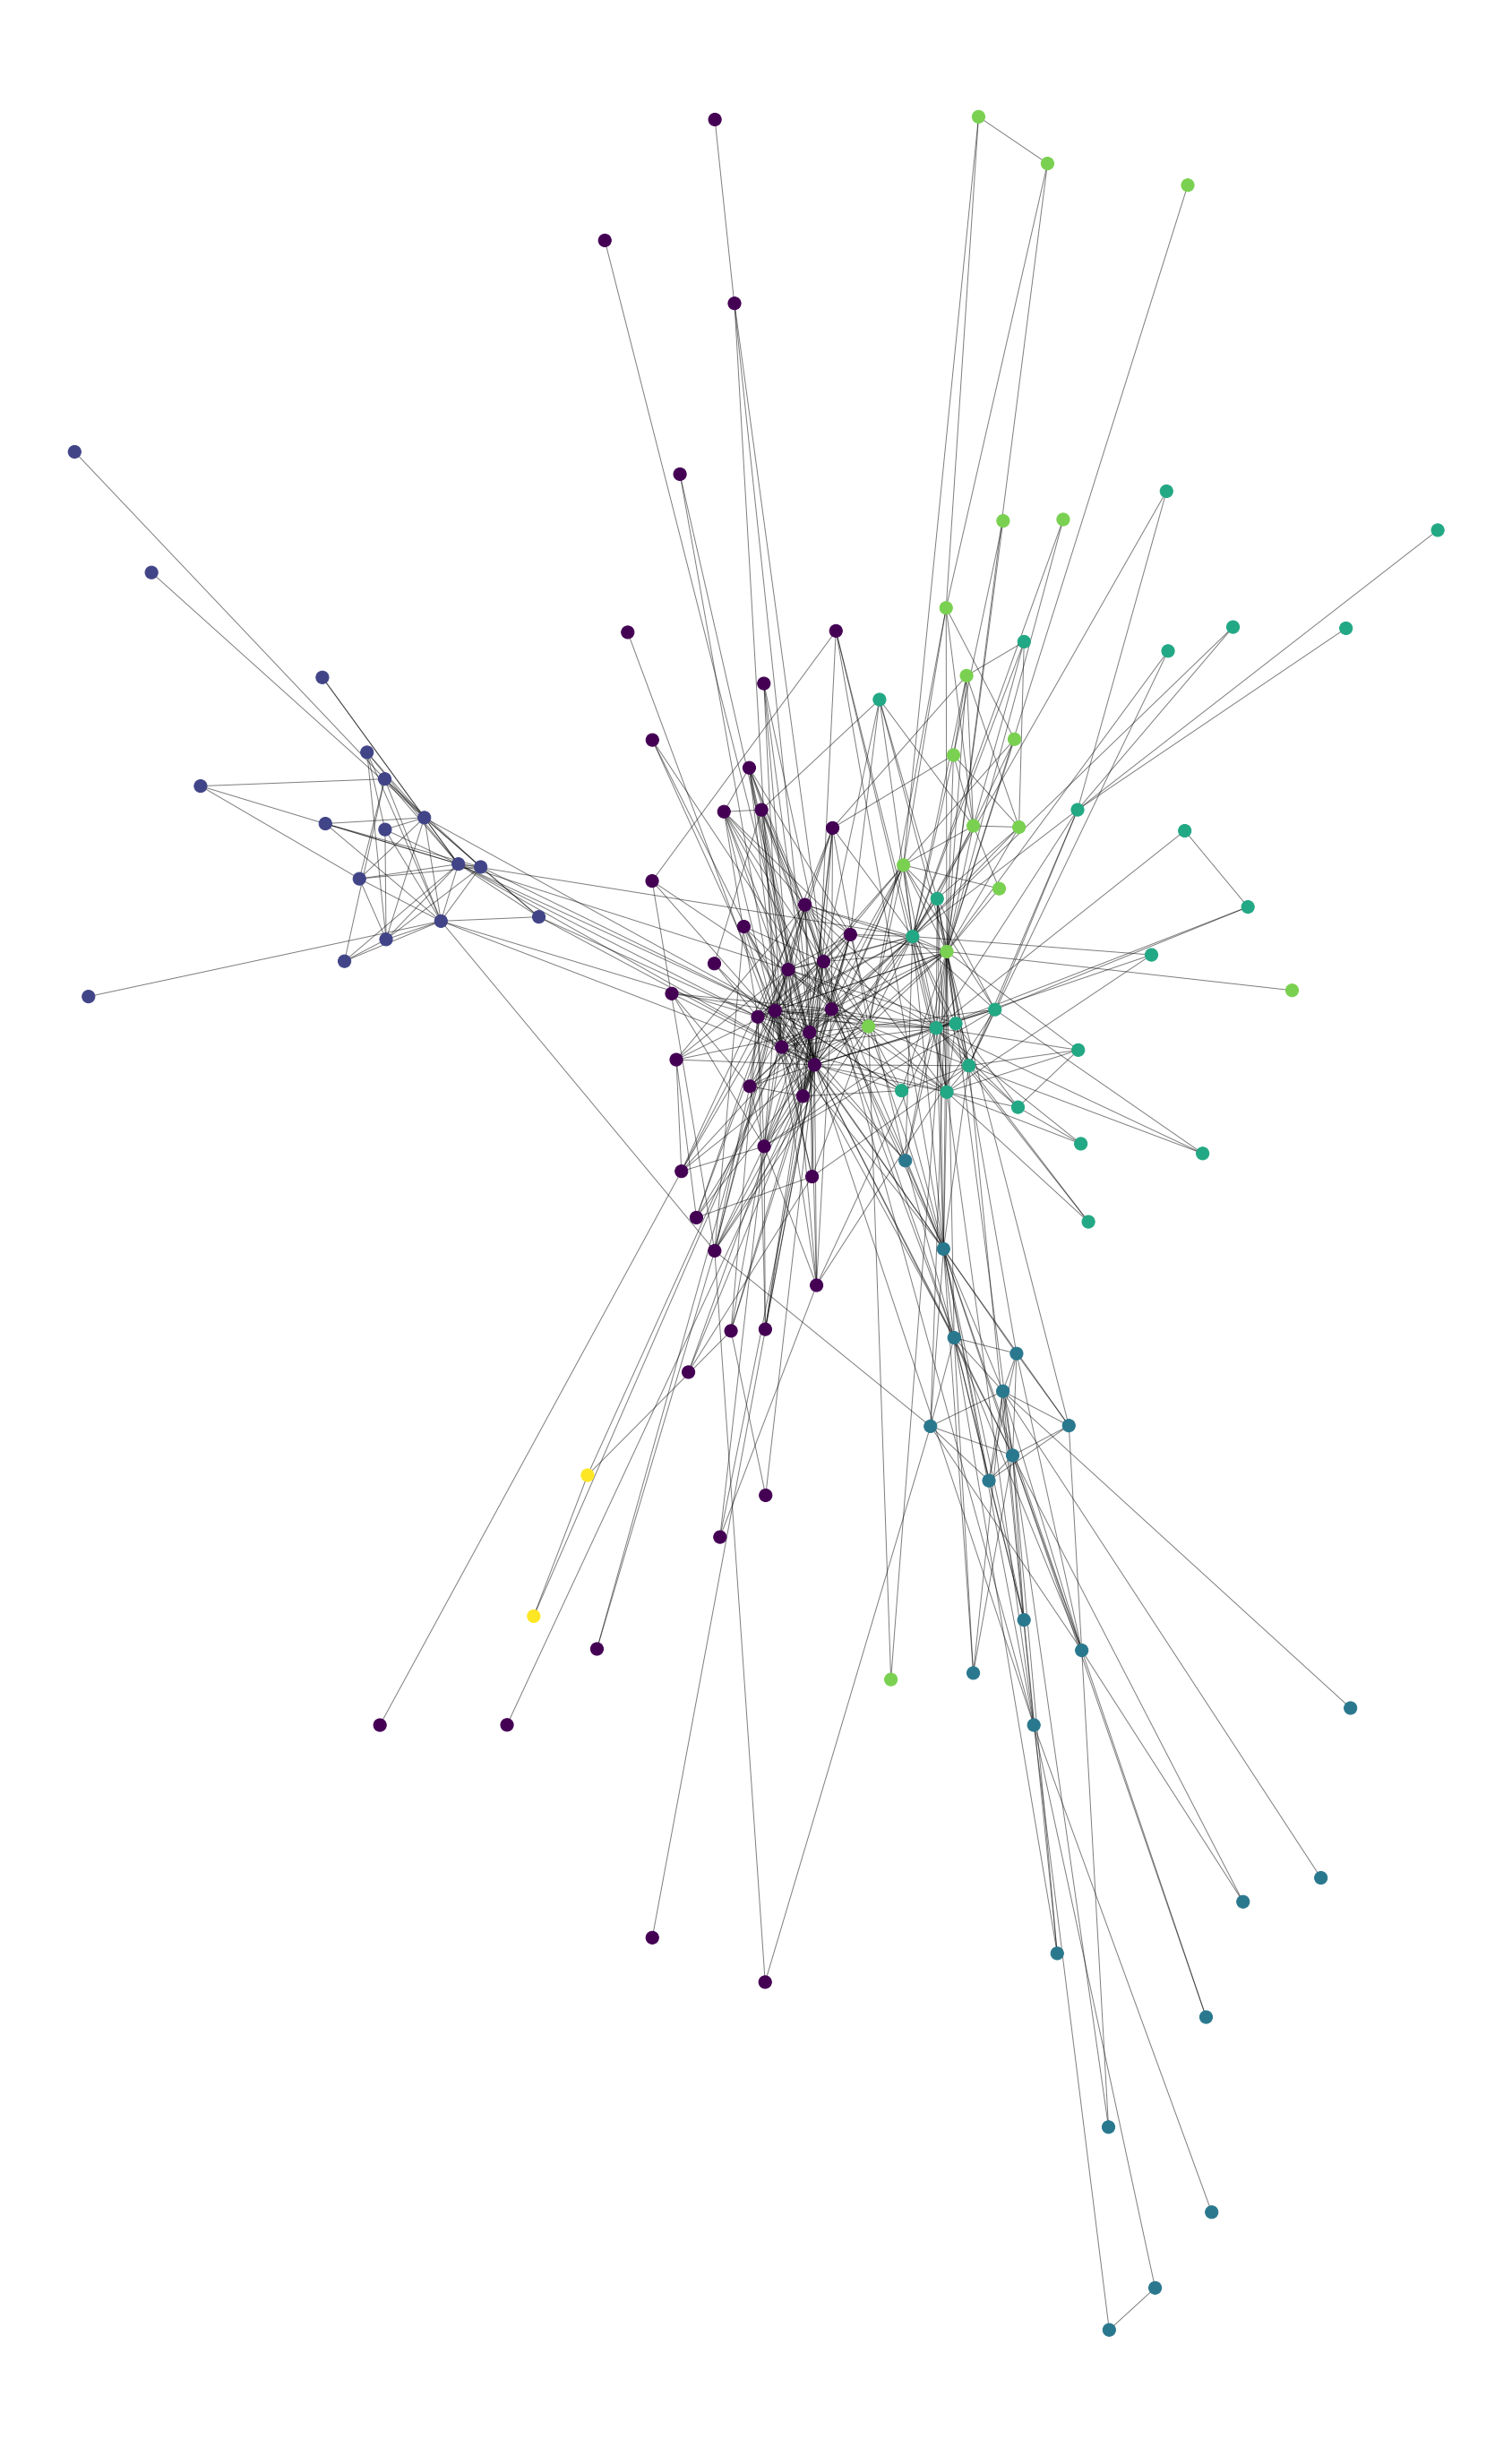

In [23]:
pos = nx.spring_layout(G)
plt.figure(figsize=(30,50))
cmap = cm.get_cmap('viridis', max(louvain_partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, louvain_partition.keys(), node_size = 200,cmap = cmap, node_color = list(louvain_partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off')
plt.show()

In [24]:
girvan_components = c.girvan_newman(G)

In [25]:
i = 0
for row in girvan_components:
    if (i == 0):
        final_row = row
    i = i + 1
    
print(final_row)

({'ROBIN', 'LYSA', 'BRONN', 'WILL', 'THEON', 'GALBART_GLOVER', 'ADDAM_MARBRAND', 'AEGON', 'JAREMY_RYKKER', 'ROYCE', 'RICKON', 'OLD_NAN', 'GRENN', 'TYWIN', 'BRANDON_STARK', 'NED', 'STEFFON', 'TOMMEN', 'STANNIS', 'BARRISTAN', 'RHAEGAR', 'BALON', 'YOREN', 'TOMARD', 'VARYS', 'OSHA', 'JAIME', 'CERSEI', 'JOANNA', 'ROOSE_BOLTON', 'ROBERT', 'RICKARD_KARSTARK', 'SAM', 'SHAGGA', 'PYCELLE', 'SYRIO_FOREL', 'VARDIS_EGAN', 'PYP', 'HOUND', 'ILYN_PAYNE', 'BENJEN', 'HUGH_OF_THE_VALE', 'LITTLEFINGER', 'KEVAN', 'BORCAS', 'OTHOR', 'GARED', 'HOT_PIE', 'GREATJON_UMBER', 'LYANNA', 'GENDRY', 'JOYEUSE', 'MASHA_HEDDLE', 'JOFFREY', 'BOWEN_MARSH', 'SEPTA_MORDANE', 'DAREON', 'HIGH_SEPTON', 'AERYS', 'LEO_LEFFORD', 'VARLY', 'TYRION', 'JON_ARRYN', 'HODOR', 'JORY_CASSEL', 'RANDYLL', 'SANSA', 'RENLY', 'JONOS_BRACKEN', 'BERIC', 'RODRIK', 'JON', 'ROBB', 'MYRCELLA', 'TOBHO_MOTT', 'ARYA', 'MELESSA', 'BAELOR', 'LUKE', 'SHAE', 'TYSHA', 'BRAN', 'MORD', 'WAYMAR_ROYCE', 'RICKARD_STARK', 'HOSTER', 'JANOS', 'LORAS', 'MOUNTAIN', '

In [26]:
girvan_partition = dict()
L = list(final_row)
p = 0

for comp in L:
    for entry in comp:
        girvan_partition[entry] = p
    p = p + 1
    
print(girvan_partition)

{'ROBIN': 0, 'LYSA': 0, 'BRONN': 0, 'WILL': 0, 'THEON': 0, 'GALBART_GLOVER': 0, 'ADDAM_MARBRAND': 0, 'AEGON': 0, 'JAREMY_RYKKER': 0, 'ROYCE': 0, 'RICKON': 0, 'OLD_NAN': 0, 'GRENN': 0, 'TYWIN': 0, 'BRANDON_STARK': 0, 'NED': 0, 'STEFFON': 0, 'TOMMEN': 0, 'STANNIS': 0, 'BARRISTAN': 0, 'RHAEGAR': 0, 'BALON': 0, 'YOREN': 0, 'TOMARD': 0, 'VARYS': 0, 'OSHA': 0, 'JAIME': 0, 'CERSEI': 0, 'JOANNA': 0, 'ROOSE_BOLTON': 0, 'ROBERT': 0, 'RICKARD_KARSTARK': 0, 'SAM': 0, 'SHAGGA': 0, 'PYCELLE': 0, 'SYRIO_FOREL': 0, 'VARDIS_EGAN': 0, 'PYP': 0, 'HOUND': 0, 'ILYN_PAYNE': 0, 'BENJEN': 0, 'HUGH_OF_THE_VALE': 0, 'LITTLEFINGER': 0, 'KEVAN': 0, 'BORCAS': 0, 'OTHOR': 0, 'GARED': 0, 'HOT_PIE': 0, 'GREATJON_UMBER': 0, 'LYANNA': 0, 'GENDRY': 0, 'JOYEUSE': 0, 'MASHA_HEDDLE': 0, 'JOFFREY': 0, 'BOWEN_MARSH': 0, 'SEPTA_MORDANE': 0, 'DAREON': 0, 'HIGH_SEPTON': 0, 'AERYS': 0, 'LEO_LEFFORD': 0, 'VARLY': 0, 'TYRION': 0, 'JON_ARRYN': 0, 'HODOR': 0, 'JORY_CASSEL': 0, 'RANDYLL': 0, 'SANSA': 0, 'RENLY': 0, 'JONOS_BRACKEN': 0

In [27]:
print("With the Girvan-Newman method:")
print("\n")
print("There are {} communities".format(len(girvan_partition)))
print("The size of the largest community is {}".format(max(girvan_partition.values())))
print("The size of the largest community is {}".format(min(girvan_partition.values())))
print("Modularity is {}".format(community.modularity(girvan_partition, G)))

With the Girvan-Newman method:


There are 127 communities
The size of the largest community is 1
The size of the largest community is 0
Modularity is 0.22346268374843803


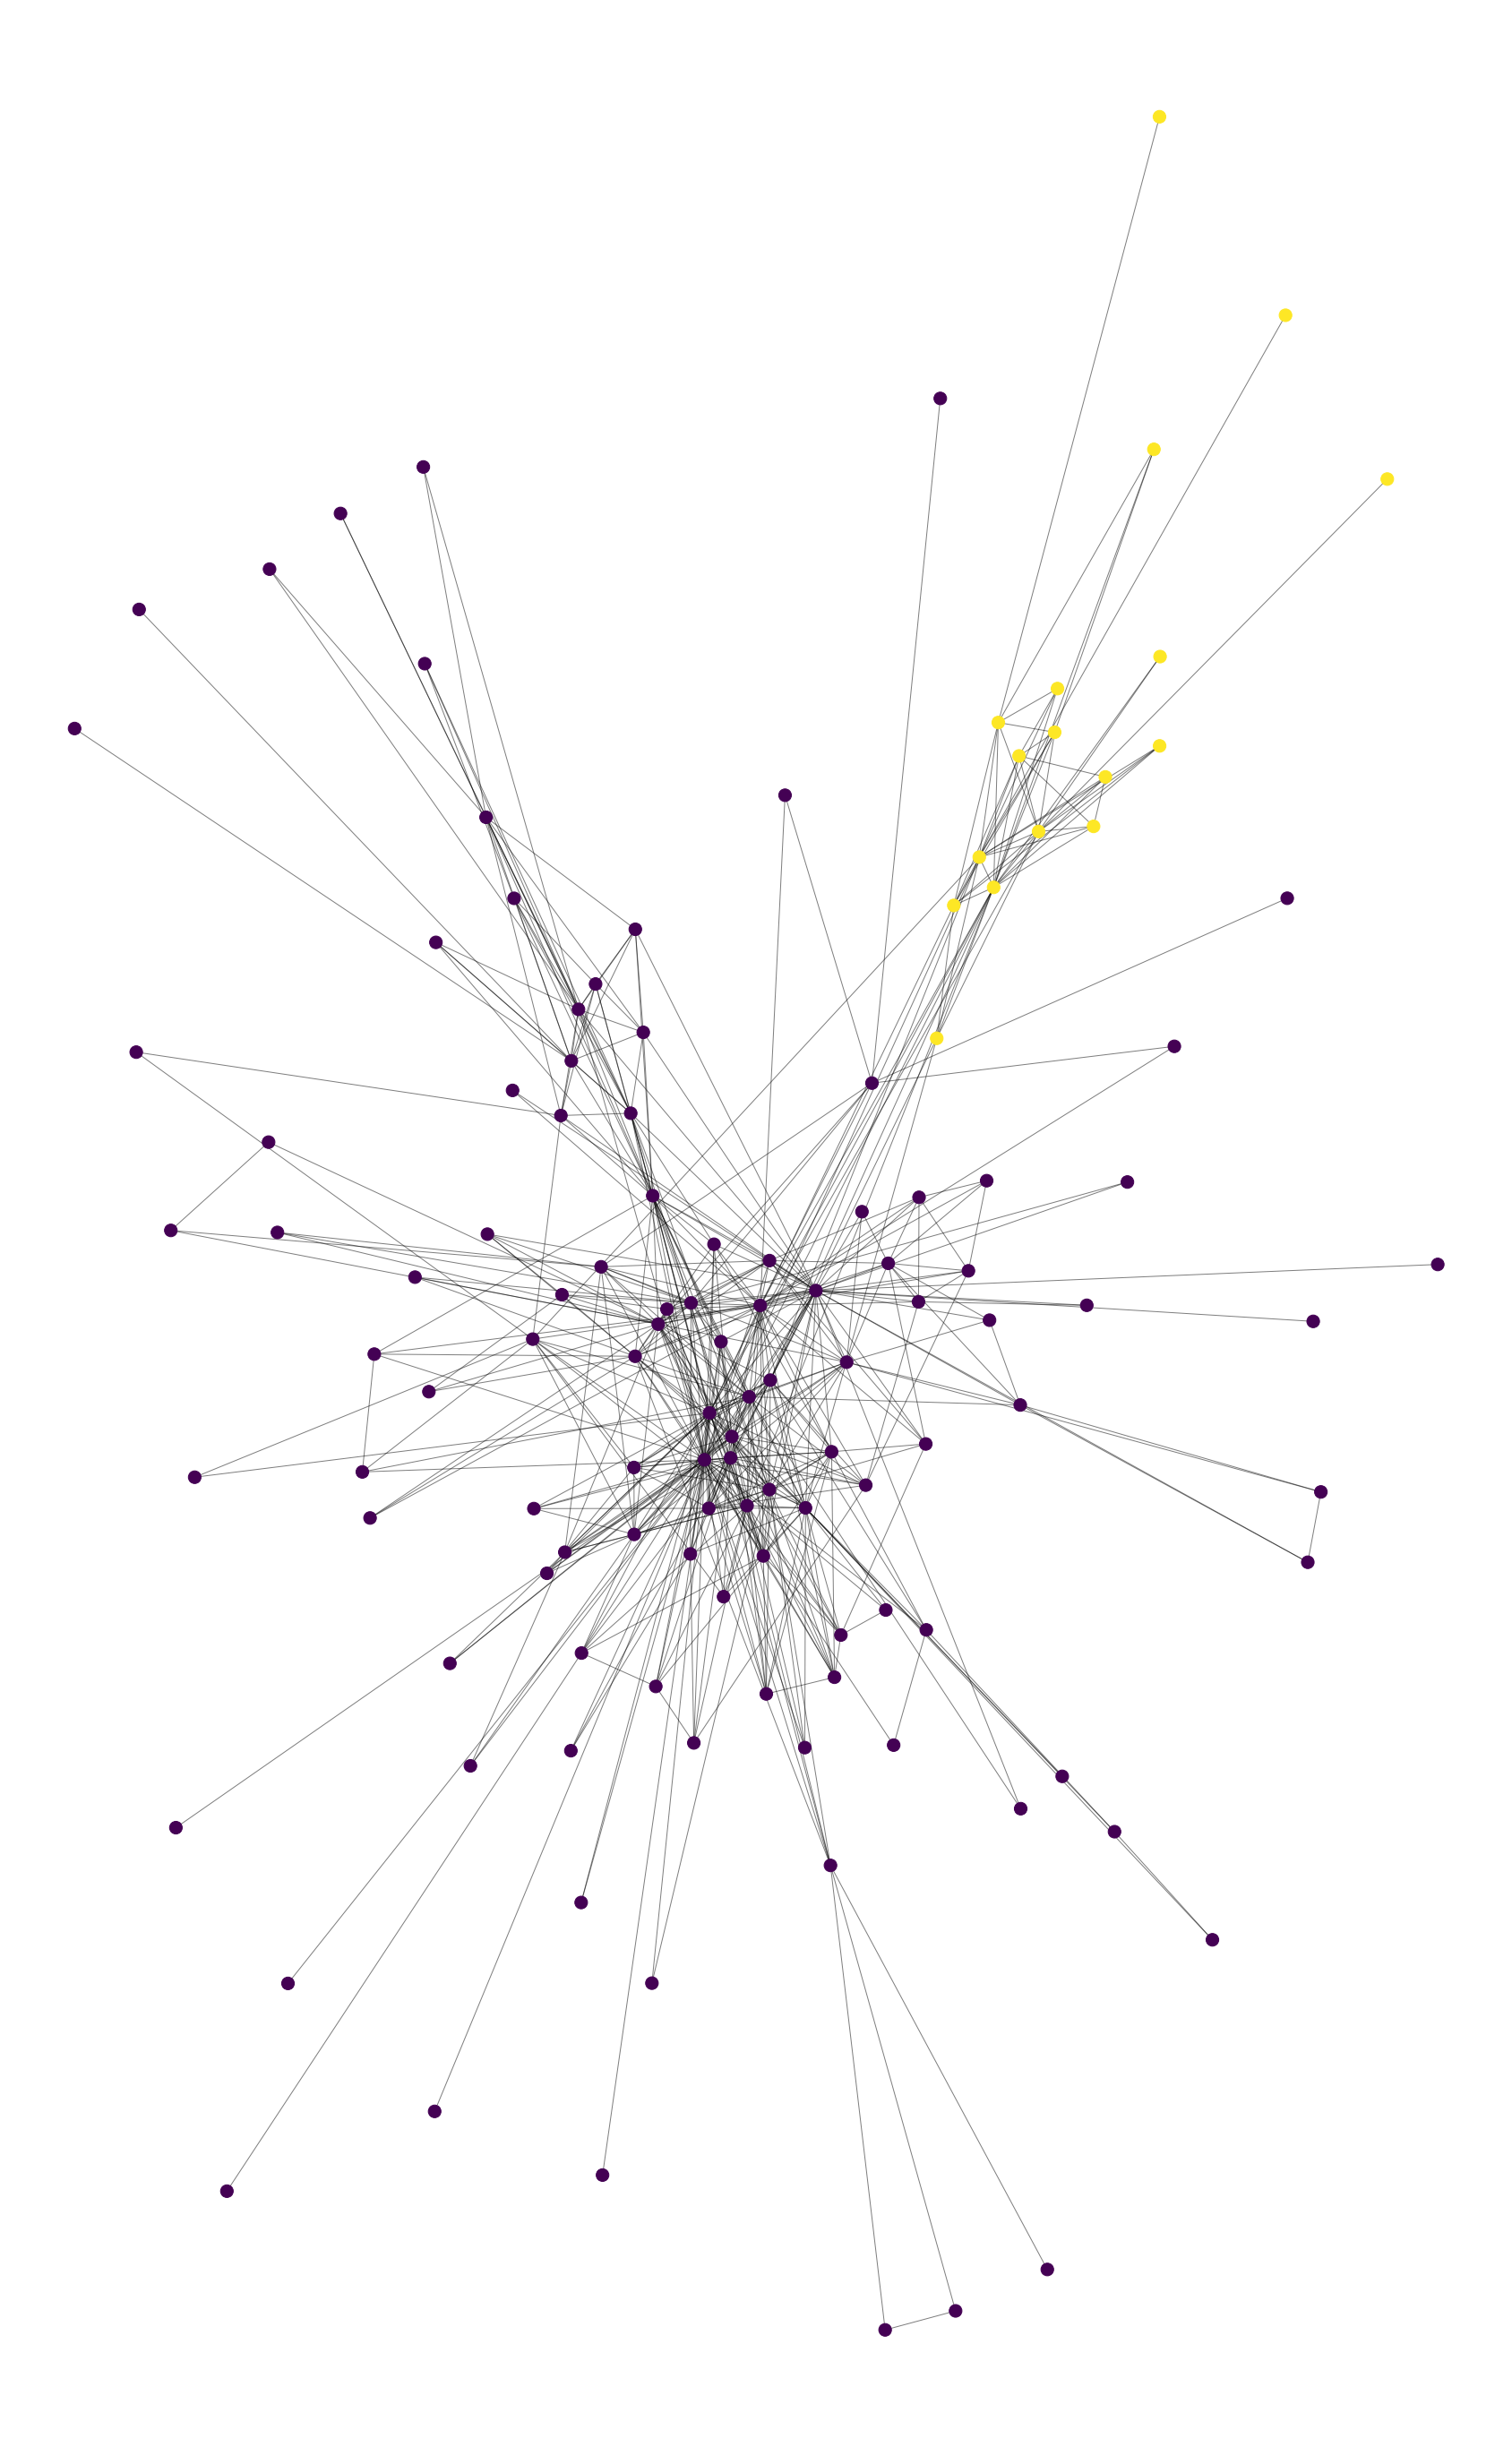

In [28]:
pos = nx.spring_layout(G)
plt.figure(figsize=(30,50))
cmapp = cm.get_cmap('viridis', max(girvan_partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, girvan_partition.keys(), node_size = 200,cmap = cmapp, node_color = list(girvan_partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off')
plt.show()